<a href="https://colab.research.google.com/github/kllamaf/COMP4471-Project/blob/main/COMP4471_DeepLab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!git clone https://github.com/srihari-humbarwadi/DeepLabV3_Plus-Tensorflow2.0
%cd "/content/DeepLabV3_Plus-Tensorflow2.0"
!pip install --upgrade keras keras-applications
!pip install --upgrade tensorflow==2.0 tensorflow-gpu==2.0

Cloning into 'DeepLabV3_Plus-Tensorflow2.0'...
remote: Enumerating objects: 172, done.
remote: Total 172 (delta 0), reused 0 (delta 0), pack-reused 172
Receiving objects: 100% (172/172), 136.41 MiB | 17.08 MiB/s, done.
Resolving deltas: 100% (76/76), done.
/content/DeepLabV3_Plus-Tensorflow2.0
Requirement already up-to-date: keras in /usr/local/lib/python3.6/dist-packages (2.4.3)
     |████████████████████████████████| 51kB 2.8MB/s 
     |████████████████████████████████| 86.3MB 85kB/s 
     |████████████████████████████████| 380.8MB 28kB/s 
     |████████████████████████████████| 450kB 45.5MB/s 
     |████████████████████████████████| 3.8MB 18.2MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7542 sha256=d056094ce23bad3c9762079813f9f629314dace72b4137f17309d032350dc875
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.11.0 has requirement gast>=0.3.

In [3]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.python.keras.models import Model, load_model
from tensorflow.python.keras.preprocessing.image import load_img, img_to_array
from deeplab import DeepLabV3Plus
import tensorflow as tf
import cv2
from tqdm import tqdm
import os
import random
from glob import glob
import pickle
import time
import json
from tensorflow.keras.utils import multi_gpu_model
from tensorflow.python.keras.utils import Sequence
from moviepy.editor import VideoFileClip, ImageSequenceClip
from tensorflow.keras.applications.resnet50 import preprocess_input

print('Tensorflow', tf.__version__)

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)2228224/45929032 bytes (4.9%)6193152/45929032 bytes (13.5%)10272768/45929032 bytes (22.4%)14475264/45929032 bytes (31.5%)18563072/45929032 bytes (40.4%)22765568/45929032 bytes (49.6%)26910720/45929032 bytes (58.6%)31105024/45929032 bytes (67.7%)35291136/45929032 bytes (76.8%)39469056/45929032 bytes (85.9%)43573248/45929032 bytes (94.9%)45929032/45929032 bytes (100.0%)
  Done
File saved as /root

In [4]:
h, w = 800, 1600
with open('cityscapes_dict.pkl', 'rb') as f:
    id_to_color = pickle.load(f)['color_map']

In [18]:
id_to_color

{-1: (0, 0, 142),
 0: (0, 0, 0),
 1: (0, 0, 0),
 2: (0, 0, 0),
 3: (0, 0, 0),
 4: (0, 0, 0),
 5: (111, 74, 0),
 6: (81, 0, 81),
 7: (128, 64, 128),
 8: (244, 35, 232),
 9: (250, 170, 160),
 10: (230, 150, 140),
 11: (70, 70, 70),
 12: (102, 102, 156),
 13: (190, 153, 153),
 14: (180, 165, 180),
 15: (150, 100, 100),
 16: (150, 120, 90),
 17: (153, 153, 153),
 18: (153, 153, 153),
 19: (250, 170, 30),
 20: (220, 220, 0),
 21: (107, 142, 35),
 22: (152, 251, 152),
 23: (70, 130, 180),
 24: (220, 20, 60),
 25: (255, 0, 0),
 26: (0, 0, 142),
 27: (0, 0, 70),
 28: (0, 60, 100),
 29: (0, 0, 90),
 30: (0, 0, 110),
 31: (0, 80, 100),
 32: (0, 0, 230),
 33: (119, 11, 32)}

In [5]:
model = DeepLabV3Plus(h, w, 34)
model.load_weights('last_epoch.h5')

*** Building DeepLabv3Plus Network ***
94658560/94653016 [==============================] - 7s 0us/step
*** Output_Shape => (None, 800, 1600, 34) ***


In [ ]:
# from resnet import resnet50

# from tensorflow.python.keras.applications import keras_modules_injection
# from tensorflow.python.util.tf_export import keras_export


# @keras_export('keras.applications.resnet50.ResNet50',
#               'keras.applications.ResNet50')
# @keras_modules_injection

# def ResNet50(*args, **kwargs):
#   return resnet50.ResNet50(*args, **kwargs)

# model = ResNet50(input_shape=(
#         800, 1600, 3), weights='imagenet', include_top=False)

In [ ]:
# model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 800, 1600, 3 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 806, 1606, 3) 0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 400, 800, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 400, 800, 64) 256         conv1[0][0]                      
___________________________________________________________________________________________

In [6]:
def pipeline(image, video=True, return_seg=False, fname='', folder=''):
    global b
    alpha = 0.5
    dims = image.shape
    image = cv2.resize(image, (w, h))
    x = image.copy()
    z = model.predict(preprocess_input(np.expand_dims(x, axis=0)))
    z = np.squeeze(z)
    y = np.argmax(z, axis=2)
    
    img_color = image.copy()   
    for i in np.unique(y):
        if i in id_to_color:
            img_color[y==i] = id_to_color[i]
    disp = img_color.copy()
    if video:
        cv2.addWeighted(image, alpha, img_color, 1-alpha, 0, img_color)        
        return img_color
    if return_seg:
        return img_color/255.
    else:
        cv2.addWeighted(image, alpha, img_color, 1-alpha, 0, img_color)
#         return disp
#         plt.figure(figsize=(20, 10))
#         out = np.concatenate([image/255, img_color/255, disp/255], axis=1)
        
#         plt.imshow(img_color/255.0)
        return img_color, disp
#         plt.imshow(out)
#         return cv2.imwrite(f'outputs/{folder}/{fname}',  cv2.cvtColor(img_color, cv2.COLOR_RGB2BGR))

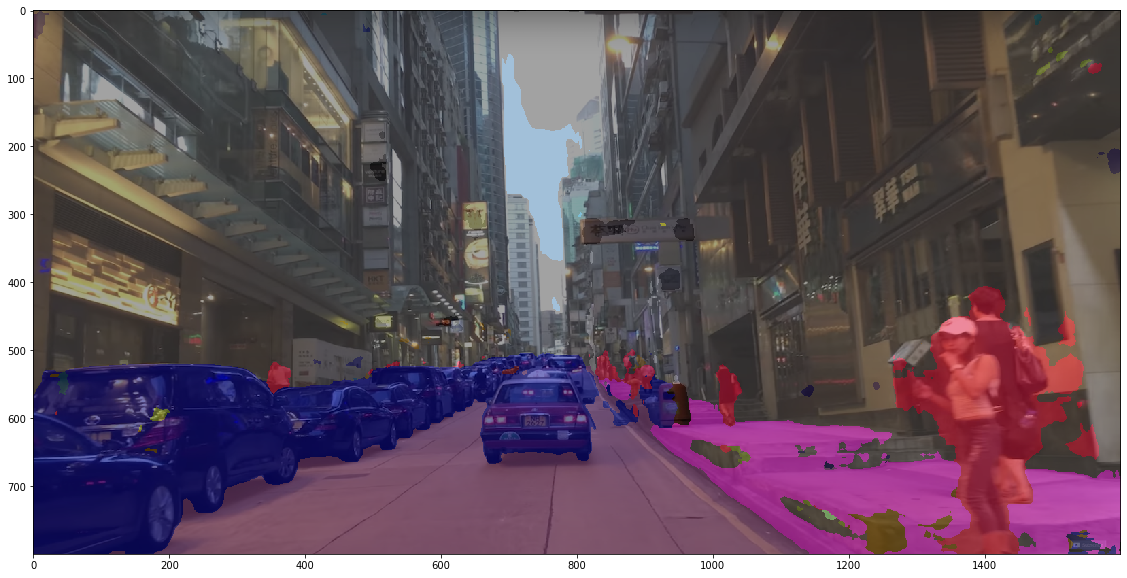

In [ ]:
test = load_img(f'sample1.png')
test = img_to_array(test)
# cv2.imshow('gg', test)
pipeline(test, video=False, fname='sample1_e.png')

In [ ]:
cv2.imwrite('sample1_e.png', test)

True

In [ ]:
test = load_img(f'sample2.png')
test = img_to_array(test)
resized = cv2.resize(test, (w, h))
cv2.imwrite('frames/sample3_e.png', resized)

True

In [ ]:
vidcap = cv2.VideoCapture('/content/drive/MyDrive/COMP4471/hkdrive4.mp4')

count = 0
while True:
    success,image = vidcap.read()
    if (not success): 
      #print("Failed to read frame: " %d, count)
      break
    if (count % 90 == 0):
        img_input = img_to_array(image)
        img_input = cv2.resize(img_input, (w, h))
        cv2.imwrite("hkdrive3/orig/%d.jpg" % count, img_input)
        mix, mask = pipeline(img_input, video=False)
        b, g, r = cv2.split(mask)
        mask = np.dstack((r,g,b))
        cv2.imwrite("hkdrive3/mask/%d.jpg" % count, mask)     # save frame as JPEG file

        img_input = img_to_array(cv2.flip(image, 1))
        img_input = cv2.resize(img_input, (w, h))
        cv2.imwrite("hkdrive3/orig/%d.jpg" % (count + 1), img_input)
        mix, mask = pipeline(img_input, video=False)
        b, g, r = cv2.split(mask)
        mask = np.dstack((r,g,b))
        cv2.imwrite("hkdrive3/mask/%d.jpg" % (count + 1), mask)

    count += 1

In [10]:
!rm -rf hkdrive3/*
!mkdir -p hkdrive3/orig
!mkdir hkdrive3/mask

In [9]:
!cp -R hkdrive3 /content/drive/MyDrive/COMP4471/

In [16]:
!rm -rf /content/drive/MyDrive/COMP4471/hkdrive

